<a href="https://colab.research.google.com/github/Intanpratiwiiii/Intann/blob/main/Denoising_an_Image_using_Mean_and_Median_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import cv2
import numpy as np
from skimage import img_as_ubyte
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

## original image
img = cv2.imread('lenna.png', 0)
img = img/img.max() # normalize the pixel value (0~1)

## noise image
# Gaussian Noise

In [14]:
# x, y = img.shape
# mean = 0
# var = 0.01
# sigma = np.sqrt(var)
# n = np.random.normal(loc=mean,
#                      scale=sigma,
#                      size=(x,y))
# img_noise = img + n

In [15]:
# Salt and Pepper Noise
x,y = img.shape
g = np.zeros((x,y), dtype=np.float32)
pepper = 0.1
salt = 0.95
for i in range(x):
    for j in range(y):
        rdn = np.random.random()
        if rdn < pepper:
            g[i][j] = 0
        elif rdn > salt:
            g[i][j] = 1
        else:
            g[i][j] = img[i][j]

img_noise = g

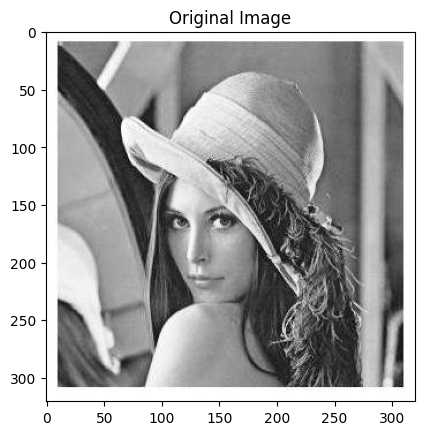

In [16]:
# preview the images
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.show()

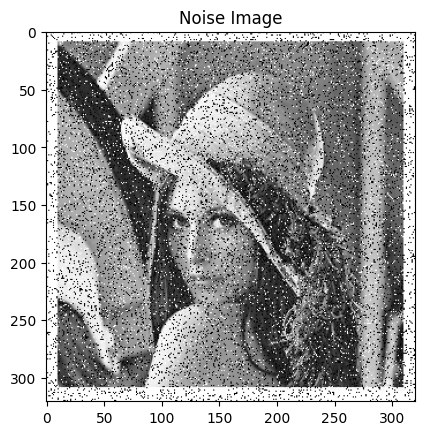

In [17]:
plt.title('Noise Image')
plt.imshow(img_noise, cmap='gray')
plt.show()

In [18]:
## denoise image
# mean filter (average)
m = 5
n = 6
denoise_mean = cv2.blur(img_noise, (m,n))

In [19]:
# median filter
img_noise_median = np.clip(img_noise, -1, 1) #pixel value range
img_noise_median = img_as_ubyte(img_noise_median) #convert to uint8
denoise_median = cv2.medianBlur(img_noise_median, 5)

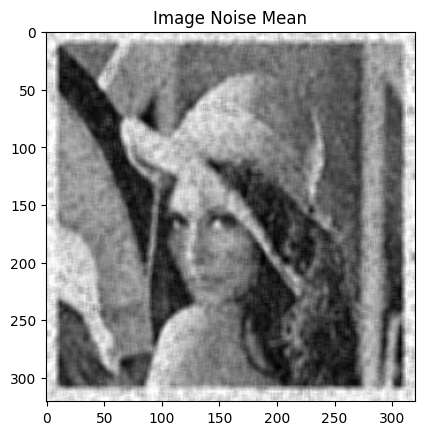

In [20]:
plt.title('Image Noise Mean')
plt.imshow(denoise_mean, cmap='gray')
plt.show()

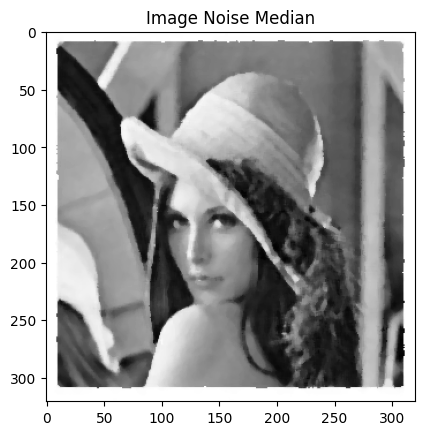

In [21]:
plt.title('Image Noise Median')
plt.imshow(denoise_median, cmap='gray')
plt.show()

In [22]:
# (optional) save the result
cv2.imwrite('Denoise mean.jpg', img_as_ubyte(denoise_mean))
cv2.imwrite('Denoise median.jpg', img_as_ubyte(denoise_median))

True